PCA(Principal Component Analysis)

In [13]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

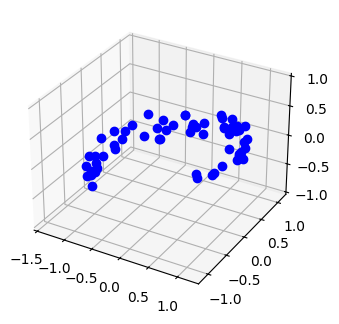

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo")
ax.set_xlim([-1.5, 1.3])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1, 1])
plt.show()

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

We can find the main components

In [16]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

know the information obtained in each of them

In [17]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

How much information are we losing?

In [18]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

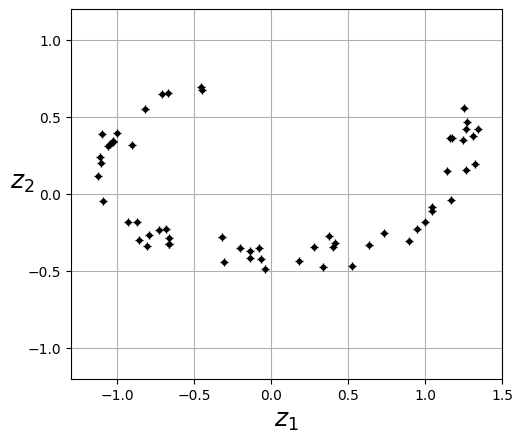

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.3, 1.5, -1.2, 1.2])
ax.grid(True)

And recover the original data (taking into account that we cannot recover the lost information).

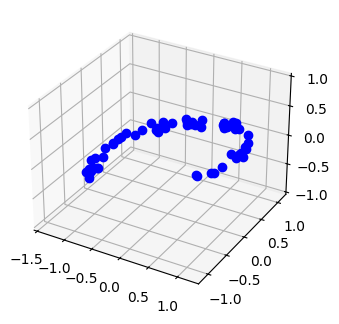

In [20]:
X3D_inv = pca.inverse_transform(X2D)

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "bo")
ax.set_xlim([-1.5, 1.3])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1, 1])
plt.show()

In [21]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1)) # mse

0.010170337792848549